In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()
os.chdir('/home/piai/바탕화면/유아용품')

In [4]:
df1_raw = pd.read_csv('고객정보데이터_Y포함_RFM미포함1.csv')
df1_raw.head(2)

,고객번호,성별,결혼유무,거주지역,연령,유입경로,자녀여부,총결제금액(M),평균결제금액,총구매횟수(F),첫구매물품,구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,총할인금액,총할인율(%),이탈여부
0,201905310906249,여,미혼,강원,30.0,인스타그램,No,238606,59652,4,2단계,0,395,53439,1.0,14.0,69334,22.52,1
1,201911051026236,여,기혼,경기,34.0,네이버카페,No,95902,95902,1,5단계,0,0,0,15.0,15.0,3998,4.00,1


In [5]:
df1_raw['이탈여부'].value_counts()

0    59328
1    21738
Name: 이탈여부, dtype: int64

In [6]:
df_rfm = pd.read_csv('고객번호,RFM등급.csv')
df_rfm

,고객번호,등급_W
0,201905310906249,5
1,201911051026236,4
2,201907190943018,5
3,201912051040386,3
4,201902220809806,3
...,...,...
81061,201812310749942,1
81062,201812310750044,1
81063,201812310750017,1
81064,201901010750085,1


In [7]:
# df_raw와 sales 데이터셋을 '고객번호' 기준으로 병합
df_raw = pd.merge(df1_raw,df_rfm, on='고객번호', how='left')
df_raw.head(2)

,고객번호,성별,결혼유무,거주지역,연령,유입경로,자녀여부,총결제금액(M),평균결제금액,총구매횟수(F),첫구매물품,구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,총할인금액,총할인율(%),이탈여부,등급_W
0,201905310906249,여,미혼,강원,30.0,인스타그램,No,238606,59652,4,2단계,0,395,53439,1.0,14.0,69334,22.52,1,5
1,201911051026236,여,기혼,경기,34.0,네이버카페,No,95902,95902,1,5단계,0,0,0,15.0,15.0,3998,4.00,1,4


In [8]:
# Data 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (81066, 20)

변수 :  Index(['고객번호', '성별', '결혼유무', '거주지역', '연령', '유입경로', '자녀여부', '총결제금액(M)',
       '평균결제금액', '총구매횟수(F)', '첫구매물품', '구매경과일(R)', '활동기간', '구매금액표준편차', '첫구매시월령',
       '마지막구매시월령', '총할인금액', '총할인율(%)', '이탈여부', '등급_W'],
      dtype='object')


In [9]:
print(df_raw.dtypes)

고객번호          int64
성별           object
결혼유무         object
거주지역         object
연령          float64
유입경로         object
자녀여부         object
총결제금액(M)      int64
평균결제금액        int64
총구매횟수(F)      int64
첫구매물품        object
구매경과일(R)      int64
활동기간          int64
구매금액표준편차      int64
첫구매시월령      float64
마지막구매시월령    float64
총할인금액         int64
총할인율(%)     float64
이탈여부          int64
등급_W          int64
dtype: object


In [10]:
# 명목형 변수 목록
obj_cols = df_raw.select_dtypes("object").columns

for col in obj_cols:
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

성별 : 2
결혼유무 : 2
거주지역 : 15
유입경로 : 10
자녀여부 : 2
첫구매물품 : 21


In [11]:
df_raw.isnull().sum()

고객번호        0
성별          0
결혼유무        0
거주지역        0
연령          0
유입경로        0
자녀여부        0
총결제금액(M)    0
평균결제금액      0
총구매횟수(F)    0
첫구매물품       0
구매경과일(R)    0
활동기간        0
구매금액표준편차    0
첫구매시월령      0
마지막구매시월령    0
총할인금액       0
총할인율(%)     0
이탈여부        0
등급_W        0
dtype: int64

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81066 entries, 0 to 81065
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객번호      81066 non-null  int64  
 1   성별        81066 non-null  object 
 2   결혼유무      81066 non-null  object 
 3   거주지역      81066 non-null  object 
 4   연령        81066 non-null  float64
 5   유입경로      81066 non-null  object 
 6   자녀여부      81066 non-null  object 
 7   총결제금액(M)  81066 non-null  int64  
 8   평균결제금액    81066 non-null  int64  
 9   총구매횟수(F)  81066 non-null  int64  
 10  첫구매물품     81066 non-null  object 
 11  구매경과일(R)  81066 non-null  int64  
 12  활동기간      81066 non-null  int64  
 13  구매금액표준편차  81066 non-null  int64  
 14  첫구매시월령    81066 non-null  float64
 15  마지막구매시월령  81066 non-null  float64
 16  총할인금액     81066 non-null  int64  
 17  총할인율(%)   81066 non-null  float64
 18  이탈여부      81066 non-null  int64  
 19  등급_W      81066 non-null  int64  
dtypes: float64(4), int64(10), ob

# 이탈률 예측 모델 생성

🧭 분석 로드맵


1️⃣ 이탈자 집단과 비교 분석

→ 어떤 특성 차이가 있는지 통계적/시각적으로 비교


2️⃣ 전체 고객 대비 비이탈자 특징 분석

→ 비이탈자를 분류하는 결정적 요인을 찾기 (EDA + 통계 분석)


3️⃣ 클러스터링 + 예측 모델링

→ 고객 세분화 & 이탈 예측 모델 만들기 (머신러닝 기법 활용)

수치형 변수 ✅ 독립표본 t-검정 (ttest_ind)

범주형 변수 ✅ 카이제곱 검정 (chi2_contingency)

수치형:총구매횟수(F), 총결제금액(M), 평균결제금액, 활동기간, 연령, 총할인율(%)

범주형: 성별, 결혼유무, 자녀여부, 유입경로, 거주지역

“이탈자와 비이탈자 간에 어떤 변수가 유의미하게 다르냐?”

→ 이걸 알아야 고객 이탈 예측 모델의 핵심 변수(피처)를 제대로 선정

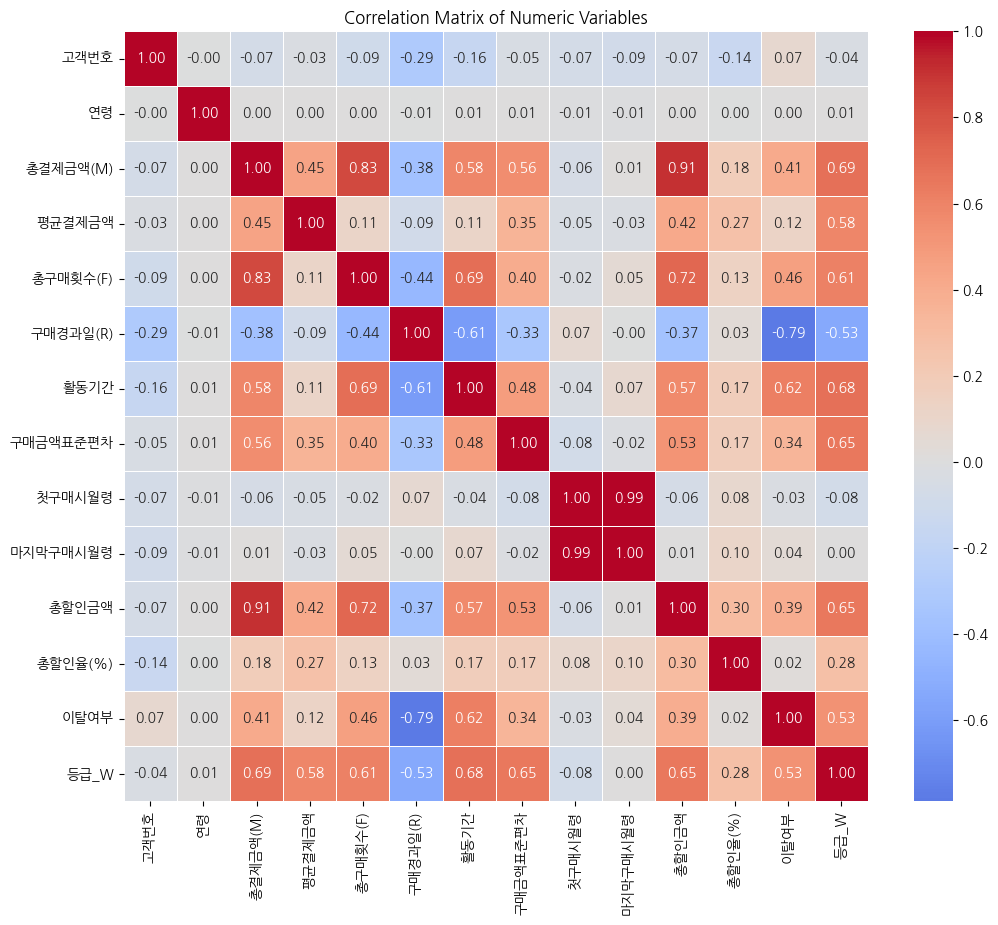

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_raw에서 수치형 변수만 선택
numeric_df = df_raw.select_dtypes(include=['float64', 'int64'])

# 수치형 변수 간의 상관 행렬 계산
correlation_matrix = numeric_df.corr()

# 상관 행렬을 히트맵으로 시각화
plt.figure(figsize=(12, 10))  # 그래프 크기 조정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)

# 타이틀 설정
plt.title("Correlation Matrix of Numeric Variables")

# 그래프 표시
plt.show()

In [14]:
# 이탈자: 이탈여부 == 0
df_churned = df_raw[df_raw['이탈여부'] == 0].copy()

# 비이탈자: 이탈여부 == 1
df_active = df_raw[df_raw['이탈여부'] == 1].copy()

# 이탈률 예측 모델 만들기

### 입력 변수(X): 고객의 특성

### 타겟 변수(y): 이탈여부

In [15]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81066 entries, 0 to 81065
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객번호      81066 non-null  int64  
 1   성별        81066 non-null  object 
 2   결혼유무      81066 non-null  object 
 3   거주지역      81066 non-null  object 
 4   연령        81066 non-null  float64
 5   유입경로      81066 non-null  object 
 6   자녀여부      81066 non-null  object 
 7   총결제금액(M)  81066 non-null  int64  
 8   평균결제금액    81066 non-null  int64  
 9   총구매횟수(F)  81066 non-null  int64  
 10  첫구매물품     81066 non-null  object 
 11  구매경과일(R)  81066 non-null  int64  
 12  활동기간      81066 non-null  int64  
 13  구매금액표준편차  81066 non-null  int64  
 14  첫구매시월령    81066 non-null  float64
 15  마지막구매시월령  81066 non-null  float64
 16  총할인금액     81066 non-null  int64  
 17  총할인율(%)   81066 non-null  float64
 18  이탈여부      81066 non-null  int64  
 19  등급_W      81066 non-null  int64  
dtypes: float64(4), int64(10), ob

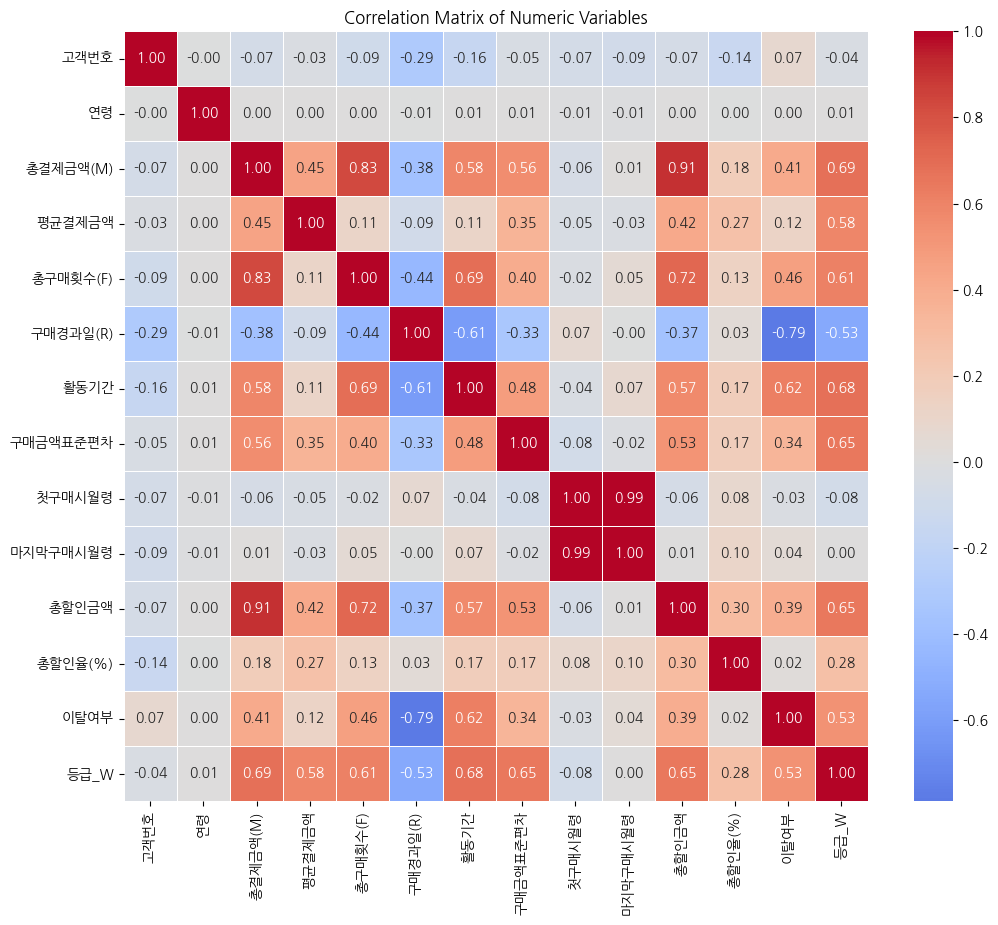

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_raw에서 수치형 변수만 선택
numeric_df = df_raw.select_dtypes(include=['float64', 'int64'])

# 수치형 변수 간의 상관 행렬 계산
correlation_matrix = numeric_df.corr()

# 상관 행렬을 히트맵으로 시각화
plt.figure(figsize=(12, 10))  # 그래프 크기 조정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)

# 타이틀 설정
plt.title("Correlation Matrix of Numeric Variables")

# 그래프 표시
plt.show()

In [17]:
# 더미 변수 생성 (문자형 변수를 더미화)
df_raw_dummy = pd.get_dummies(df_raw, drop_first=True)
df_raw_dummy

,고객번호,연령,총결제금액(M),평균결제금액,총구매횟수(F),구매경과일(R),활동기간,구매금액표준편차,첫구매시월령,마지막구매시월령,...,첫구매물품_아이_생활용품,첫구매물품_어른_생활용품,첫구매물품_음식,첫구매물품_이벤트,첫구매물품_이벤트_생리대,첫구매물품_장난감,첫구매물품_주방용품,첫구매물품_청결용품,첫구매물품_티슈,첫구매물품_화장품
0,201905310906249,30.0,238606,59652,4,0,395,53439,1.0,14.0,...,0,0,0,0,0,0,0,0,0,0
1,201911051026236,34.0,95902,95902,1,0,0,0,15.0,15.0,...,0,0,0,0,0,0,0,0,0,0
2,201907190943018,35.0,290468,72617,4,0,255,20064,10.0,13.0,...,0,0,0,0,0,0,0,0,0,0
3,201912051040386,29.0,50108,25054,1,0,0,35432,8.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4,201902220809806,34.0,48388,48388,1,0,0,0,16.0,16.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81061,201812310749942,28.0,7642,7642,1,585,0,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
81062,201812310750044,34.0,4831,4831,1,585,0,0,7.0,7.0,...,0,0,0,1,0,0,0,0,0,0
81063,201812310750017,32.0,4831,4831,1,585,0,0,5.0,5.0,...,0,0,0,1,0,0,0,0,0,0
81064,201901010750085,33.0,4158,4158,1,585,0,0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# '거주지역' 관련 컬럼만 추출 (거주지역_로 시작하는 컬럼명 찾기)
df_residence = df_raw_dummy.filter(like='거주지역')
df_residence

,거주지역_경기,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,거주지역_서울,거주지역_인천,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81061,0,1,0,0,0,0,0,0,0,0,0,0,0,0
81062,1,0,0,0,0,0,0,0,0,0,0,0,0,0
81063,1,0,0,0,0,0,0,0,0,0,0,0,0,0
81064,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
df_residence.columns

Index(['거주지역_경기', '거주지역_경남', '거주지역_경북', '거주지역_광주', '거주지역_대구', '거주지역_대전',
       '거주지역_부산', '거주지역_서울', '거주지역_인천', '거주지역_전남', '거주지역_전북', '거주지역_제주',
       '거주지역_충남', '거주지역_충북'],
      dtype='object')

In [20]:
df_raw_dummy.columns

Index(['고객번호', '연령', '총결제금액(M)', '평균결제금액', '총구매횟수(F)', '구매경과일(R)', '활동기간',
       '구매금액표준편차', '첫구매시월령', '마지막구매시월령', '총할인금액', '총할인율(%)', '이탈여부', '등급_W',
       '성별_여', '결혼유무_미혼', '거주지역_경기', '거주지역_경남', '거주지역_경북', '거주지역_광주',
       '거주지역_대구', '거주지역_대전', '거주지역_부산', '거주지역_서울', '거주지역_인천', '거주지역_전남',
       '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북', '유입경로_네이버블로그', '유입경로_네이버카페',
       '유입경로_매장쿠폰', '유입경로_오픈마켓', '유입경로_이마트', '유입경로_인스타그램', '유입경로_지인추천',
       '유입경로_직접검색', '유입경로_페이스북', '자녀여부_Yes', '첫구매물품_2단계', '첫구매물품_3단계',
       '첫구매물품_4단계', '첫구매물품_5단계', '첫구매물품_6단계', '첫구매물품_7단계', '첫구매물품_기타',
       '첫구매물품_마스크', '첫구매물품_생리대', '첫구매물품_수유용품', '첫구매물품_아이_생활용품',
       '첫구매물품_어른_생활용품', '첫구매물품_음식', '첫구매물품_이벤트', '첫구매물품_이벤트_생리대', '첫구매물품_장난감',
       '첫구매물품_주방용품', '첫구매물품_청결용품', '첫구매물품_티슈', '첫구매물품_화장품'],
      dtype='object')

In [21]:
# 사용할 피처 선택 (원하는 변수 조정 가능)
feature_cols = ['연령', '총결제금액(M)', '평균결제금액', '총구매횟수(F)','활동기간',
       '구매금액표준편차', '첫구매시월령', '마지막구매시월령', '총할인금액', '총할인율(%)','등급_W',
       '성별_여', '결혼유무_미혼', '거주지역_경기', '거주지역_경남', '거주지역_경북', '거주지역_광주',
       '거주지역_대구', '거주지역_대전', '거주지역_부산', '거주지역_서울', '거주지역_인천', '거주지역_전남',
       '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북', '유입경로_네이버블로그', '유입경로_네이버카페',
       '유입경로_매장쿠폰', '유입경로_오픈마켓', '유입경로_이마트', '유입경로_인스타그램', '유입경로_지인추천',
       '유입경로_직접검색', '유입경로_페이스북', '자녀여부_Yes', '첫구매물품_2단계', '첫구매물품_3단계',
       '첫구매물품_4단계', '첫구매물품_5단계', '첫구매물품_6단계', '첫구매물품_7단계', '첫구매물품_기타',
       '첫구매물품_마스크', '첫구매물품_생리대', '첫구매물품_수유용품', '첫구매물품_아이_생활용품',
       '첫구매물품_어른_생활용품', '첫구매물품_음식', '첫구매물품_이벤트', '첫구매물품_이벤트_생리대', '첫구매물품_장난감',
       '첫구매물품_주방용품', '첫구매물품_청결용품', '첫구매물품_티슈', '첫구매물품_화장품']

X = df_raw_dummy[feature_cols].dropna()
y = df_raw_dummy.loc[X.index, '이탈여부']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("📊 분류 리포트:\n", classification_report(y_test, y_pred))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob))



coeff = pd.DataFrame({
    '변수': feature_cols,
    '회귀계수': model.coef_[0]
}).sort_values(by='회귀계수', key=abs, ascending=False)

display(coeff)

📊 분류 리포트:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     17799
           1       0.79      0.58      0.66      6521

    accuracy                           0.84     24320
   macro avg       0.82      0.76      0.78     24320
weighted avg       0.84      0.84      0.84     24320

📈 ROC AUC Score: 0.8571106073745383


,변수,회귀계수
0,연령,-5.232299e-02
9,총할인율(%),-3.414569e-02
4,활동기간,1.200148e-02
3,총구매횟수(F),-1.644485e-03
11,성별_여,-1.560218e-03
7,마지막구매시월령,1.391795e-03
36,자녀여부_Yes,-1.282440e-03
50,첫구매물품_이벤트,-9.258019e-04
10,등급_W,-6.919684e-04
32,유입경로_인스타그램,-6.235526e-04


연령 -0.0516 나이가 많을수록 이탈 확률 높아짐 ⬆

총할인율(%) -0.0339 할인에 민감한 고객일수록 이탈 확률 높음 ⬆

활동기간 +0.0121 오래 활동할수록 이탈 확률 낮음 ⬇

총구매횟수(F) -0.0019 구매횟수 많아도 약간 이탈 경향 있음

평균결제금액 +0.0006 평균 금액 클수록 유지 가능성 조금 있음

총결제금액(M) +0.000005 영향 거의 없음

회귀계수는 양수면 이탈X 가능성↑, 음수면 이탈 확률↑

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import pandas as pd

# 모델 정의
model = LogisticRegression(max_iter=1000)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Train score
train_pred = model.predict(X_train)
train_score = accuracy_score(y_train, train_pred)

# Test score
test_score = accuracy_score(y_test, y_pred)

# 성능 평가 출력
print(f"📊 Train Score: {train_score:.4f}")
print(f"📊 Test Score: {test_score:.4f}")
print("📊 분류 리포트:\n", classification_report(y_test, y_pred))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob))

# 회귀계수 출력
coeff = pd.DataFrame({
    '변수': feature_cols,
    '회귀계수': model.coef_[0]
}).sort_values(by='회귀계수', key=abs, ascending=False)

📊 Train Score: 0.8450
📊 Test Score: 0.8440
📊 분류 리포트:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     17799
           1       0.79      0.58      0.66      6521

    accuracy                           0.84     24320
   macro avg       0.82      0.76      0.78     24320
weighted avg       0.84      0.84      0.84     24320

📈 ROC AUC Score: 0.8571106073745383


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# 모델 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# 성능 평가
print("📊 결정트리 분류 리포트:\n", classification_report(y_test, y_pred_dt))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': dt_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

display(feature_importance)

📊 결정트리 분류 리포트:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     17799
           1       0.74      0.75      0.74      6521

    accuracy                           0.86     24320
   macro avg       0.82      0.83      0.83     24320
weighted avg       0.86      0.86      0.86     24320

📈 ROC AUC Score: 0.8255317633490831


,변수,중요도
4,활동기간,0.381281
10,등급_W,0.100057
9,총할인율(%),0.096381
1,총결제금액(M),0.065189
2,평균결제금액,0.050613
7,마지막구매시월령,0.038118
0,연령,0.035794
8,총할인금액,0.035286
6,첫구매시월령,0.031933
5,구매금액표준편차,0.027802


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd

# 모델 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Train score
train_pred_dt = dt_model.predict(X_train)
train_score = accuracy_score(y_train, train_pred_dt)

# Test score
test_score = accuracy_score(y_test, y_pred_dt)

# 성능 평가 출력
print(f"📊 Train Score: {train_score:.4f}")
print(f"📊 Test Score: {test_score:.4f}")
print("📊 결정트리 분류 리포트:\n", classification_report(y_test, y_pred_dt))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': dt_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

📊 Train Score: 0.9988
📊 Test Score: 0.8627
📊 결정트리 분류 리포트:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     17799
           1       0.74      0.75      0.74      6521

    accuracy                           0.86     24320
   macro avg       0.82      0.83      0.83     24320
weighted avg       0.86      0.86      0.86     24320

📈 ROC AUC Score: 0.8255317633490831


### Random Forest

In [27]:
# 랜덤포레스트를 이용한 이탈 예측 모델

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# 성능 평가
print("📊 랜덤포레스트 분류 리포트:\n", classification_report(y_test, y_pred_rf))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': rf_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

display(feature_importance)

📊 랜덤포레스트 분류 리포트:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     17799
           1       0.87      0.74      0.80      6521

    accuracy                           0.90     24320
   macro avg       0.89      0.85      0.87     24320
weighted avg       0.90      0.90      0.90     24320

📈 ROC AUC Score: 0.9404859572868938


,변수,중요도
4,활동기간,0.146114
10,등급_W,0.124758
8,총할인금액,0.097215
1,총결제금액(M),0.092586
3,총구매횟수(F),0.079878
9,총할인율(%),0.073494
2,평균결제금액,0.062427
7,마지막구매시월령,0.058866
5,구매금액표준편차,0.053325
6,첫구매시월령,0.039979


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd

# 모델 학습
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Train score
train_pred_rf = rf_model.predict(X_train)
train_score = accuracy_score(y_train, train_pred_rf)

# Test score
test_score = accuracy_score(y_test, y_pred_rf)

# 성능 평가 출력
print(f"📊 Train Score: {train_score:.4f}")
print(f"📊 Test Score: {test_score:.4f}")
print("📊 랜덤포레스트 분류 리포트:\n", classification_report(y_test, y_pred_rf))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': rf_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

📊 Train Score: 0.9988
📊 Test Score: 0.9009
📊 랜덤포레스트 분류 리포트:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     17799
           1       0.87      0.74      0.80      6521

    accuracy                           0.90     24320
   macro avg       0.89      0.85      0.87     24320
weighted avg       0.90      0.90      0.90     24320

📈 ROC AUC Score: 0.9404859572868938


### Gradient Boost

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# 모델 학습
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# 성능 평가
print("📊 그라디언트 부스팅 분류 리포트:\n", classification_report(y_test, y_pred_gb))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_gb))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': gb_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

display(feature_importance)

📊 그라디언트 부스팅 분류 리포트:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     17799
           1       0.87      0.70      0.78      6521

    accuracy                           0.89     24320
   macro avg       0.88      0.83      0.85     24320
weighted avg       0.89      0.89      0.89     24320

📈 ROC AUC Score: 0.9287142589084043


,변수,중요도
4,활동기간,0.593856
10,등급_W,0.180926
1,총결제금액(M),0.070668
9,총할인율(%),0.068698
7,마지막구매시월령,0.020406
2,평균결제금액,0.016496
6,첫구매시월령,0.013346
3,총구매횟수(F),0.012537
8,총할인금액,0.006824
44,첫구매물품_마스크,0.006016


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd

# 모델 학습
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Train score
train_pred_gb = gb_model.predict(X_train)
train_score = accuracy_score(y_train, train_pred_gb)

# Test score
test_score = accuracy_score(y_test, y_pred_gb)

# 성능 평가 출력
print(f"📊 Train Score: {train_score:.4f}")
print(f"📊 Test Score: {test_score:.4f}")
print("📊 그라디언트 부스팅 분류 리포트:\n", classification_report(y_test, y_pred_gb))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_gb))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': gb_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

📊 Train Score: 0.8962
📊 Test Score: 0.8926
📊 그라디언트 부스팅 분류 리포트:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     17799
           1       0.87      0.70      0.78      6521

    accuracy                           0.89     24320
   macro avg       0.88      0.83      0.85     24320
weighted avg       0.89      0.89      0.89     24320

📈 ROC AUC Score: 0.9287142589084043


### XGBoost

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# 모델 학습
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 성능 평가
print("📊 XGBoost 분류 리포트:\n", classification_report(y_test, y_pred_xgb))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': xgb_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

display(feature_importance)

📊 XGBoost 분류 리포트:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     17799
           1       0.88      0.76      0.82      6521

    accuracy                           0.91     24320
   macro avg       0.90      0.86      0.88     24320
weighted avg       0.91      0.91      0.91     24320

📈 ROC AUC Score: 0.9479616903916563


,변수,중요도
4,활동기간,0.239417
10,등급_W,0.165627
44,첫구매물품_마스크,0.040697
38,첫구매물품_3단계,0.034509
1,총결제금액(M),0.031466
9,총할인율(%),0.029694
49,첫구매물품_음식,0.029321
7,마지막구매시월령,0.026244
3,총구매횟수(F),0.025357
52,첫구매물품_장난감,0.024036


In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd

# 모델 학습
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Train score
train_pred_xgb = xgb_model.predict(X_train)
train_score = accuracy_score(y_train, train_pred_xgb)

# Test score
test_score = accuracy_score(y_test, y_pred_xgb)

# 성능 평가 출력
print(f"📊 Train Score: {train_score:.4f}")
print(f"📊 Test Score: {test_score:.4f}")
print("📊 XGBoost 분류 리포트:\n", classification_report(y_test, y_pred_xgb))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': xgb_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

📊 Train Score: 0.9263
📊 Test Score: 0.9076
📊 XGBoost 분류 리포트:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     17799
           1       0.88      0.76      0.82      6521

    accuracy                           0.91     24320
   macro avg       0.90      0.86      0.88     24320
weighted avg       0.91      0.91      0.91     24320

📈 ROC AUC Score: 0.9479616903916563


### LightGBM

In [33]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# 모델 학습
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 예측
y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# 성능 평가
print("📊 LightGBM 분류 리포트:\n", classification_report(y_test, y_pred_lgb))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_lgb))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': lgb_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

display(feature_importance)

📊 LightGBM 분류 리포트:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     17799
           1       0.88      0.75      0.81      6521

    accuracy                           0.91     24320
   macro avg       0.89      0.86      0.87     24320
weighted avg       0.90      0.91      0.90     24320

📈 ROC AUC Score: 0.9461725599684301


,변수,중요도
9,총할인율(%),532
1,총결제금액(M),339
2,평균결제금액,293
4,활동기간,247
10,등급_W,227
8,총할인금액,218
7,마지막구매시월령,187
3,총구매횟수(F),165
5,구매금액표준편차,158
6,첫구매시월령,138


In [34]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd

# 모델 학습
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 예측
y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Train score
train_pred_lgb = lgb_model.predict(X_train)
train_score = accuracy_score(y_train, train_pred_lgb)

# Test score
test_score = accuracy_score(y_test, y_pred_lgb)

# 성능 평가 출력
print(f"📊 Train Score: {train_score:.4f}")
print(f"📊 Test Score: {test_score:.4f}")
print("📊 LightGBM 분류 리포트:\n", classification_report(y_test, y_pred_lgb))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_prob_lgb))

# 중요 변수 보기
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': lgb_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

📊 Train Score: 0.9123
📊 Test Score: 0.9052
📊 LightGBM 분류 리포트:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     17799
           1       0.88      0.75      0.81      6521

    accuracy                           0.91     24320
   macro avg       0.89      0.86      0.87     24320
weighted avg       0.90      0.91      0.90     24320

📈 ROC AUC Score: 0.9461725599684301


In [35]:
pip install xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


In [36]:
# 사용할 피처 선택 (원하는 변수 조정 가능)
feature_cols = ['총구매횟수(F)', '총결제금액(M)', '평균결제금액',
                '활동기간', '연령', '총할인율(%)']

X = df_raw[feature_cols].dropna()
y = df_raw.loc[X.index, '이탈여부']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 모델 리스트 정의
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'LightGBM': lgb.LGBMClassifier()
}

# 데이터 준비
df_raw_dummy = pd.get_dummies(df_raw)
feature_cols = ['총구매횟수(F)', '총결제금액(M)', '평균결제금액', '활동기간', '연령', '총할인율(%)', '등급_W']
X = df_raw_dummy[feature_cols].dropna() 
y = df_raw_dummy.loc[X.index, '이탈여부']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 각 모델의 AUC 성능 계산
auc_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # 확률 예측
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores[model_name] = auc

# 결과 출력
for model_name, auc in auc_scores.items():
    print(f"{model_name}: AUC = {auc:.4f}")

Logistic Regression: AUC = 0.8580
Decision Tree: AUC = 0.8177
Random Forest: AUC = 0.9367
Gradient Boosting: AUC = 0.9249
XGBoost: AUC = 0.9434
LightGBM: AUC = 0.9414


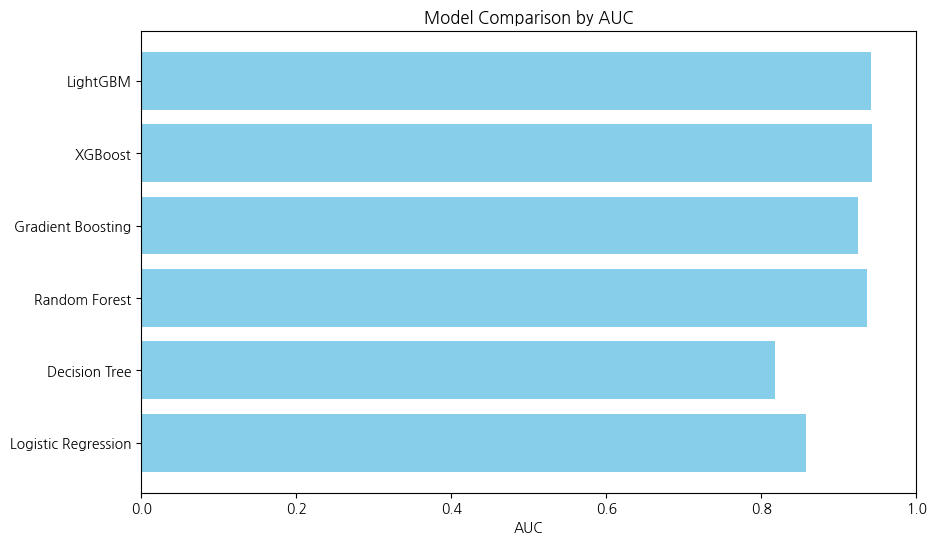

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 모델 리스트 정의
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'LightGBM': lgb.LGBMClassifier()
}

# 데이터 준비
df_raw_dummy = pd.get_dummies(df_raw)
feature_cols = ['총구매횟수(F)', '총결제금액(M)', '평균결제금액', '활동기간', '연령', '총할인율(%)', '등급_W']
X = df_raw_dummy[feature_cols].dropna() 
y = df_raw_dummy.loc[X.index, '이탈여부']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 각 모델의 AUC 성능 계산
auc_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # 확률 예측
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores[model_name] = auc

# AUC 결과를 DataFrame으로 변환
auc_df = pd.DataFrame(list(auc_scores.items()), columns=['Model', 'AUC'])

# AUC 표 시각화
plt.figure(figsize=(10, 6))
plt.barh(auc_df['Model'], auc_df['AUC'], color='skyblue')
plt.xlabel('AUC')
plt.title('Model Comparison by AUC')
plt.xlim(0, 1)
plt.show()

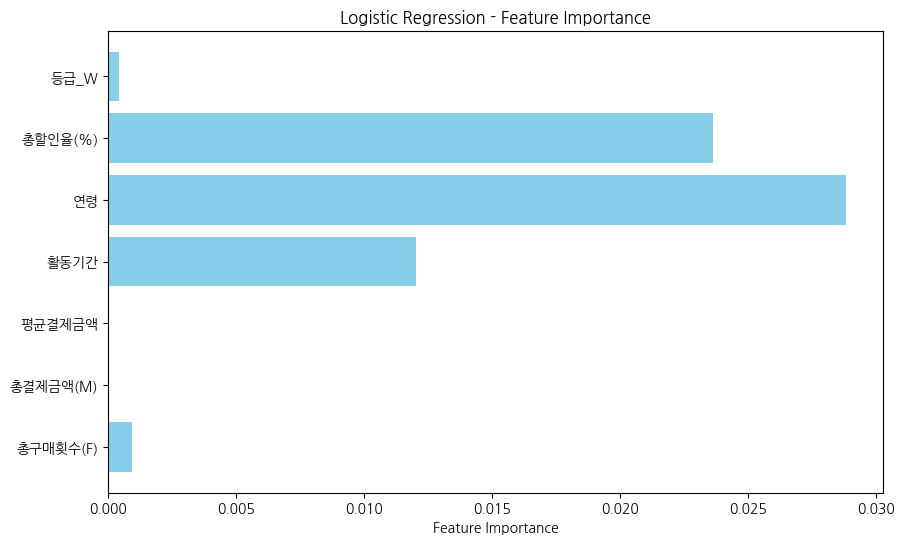

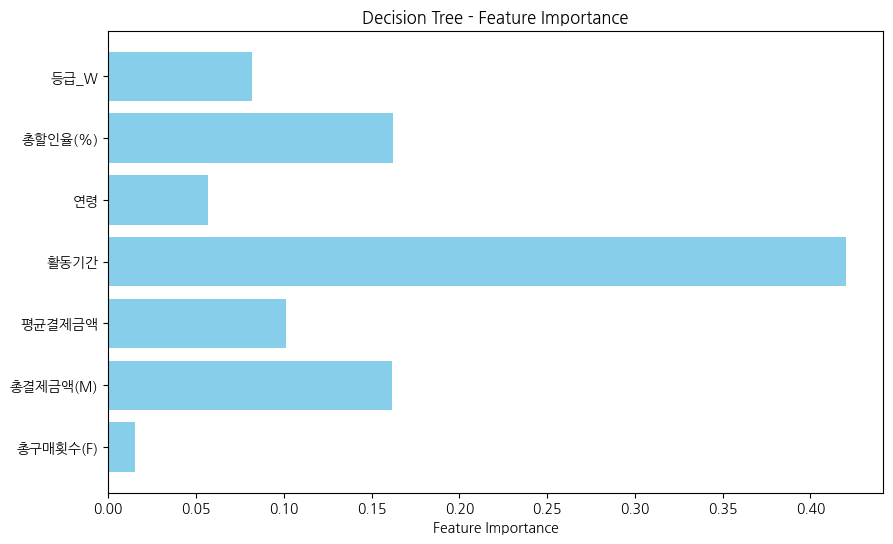

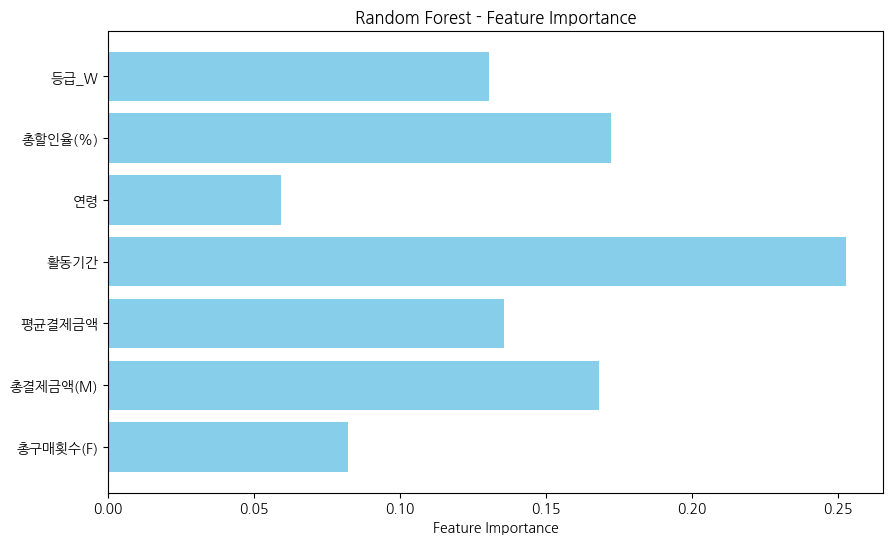

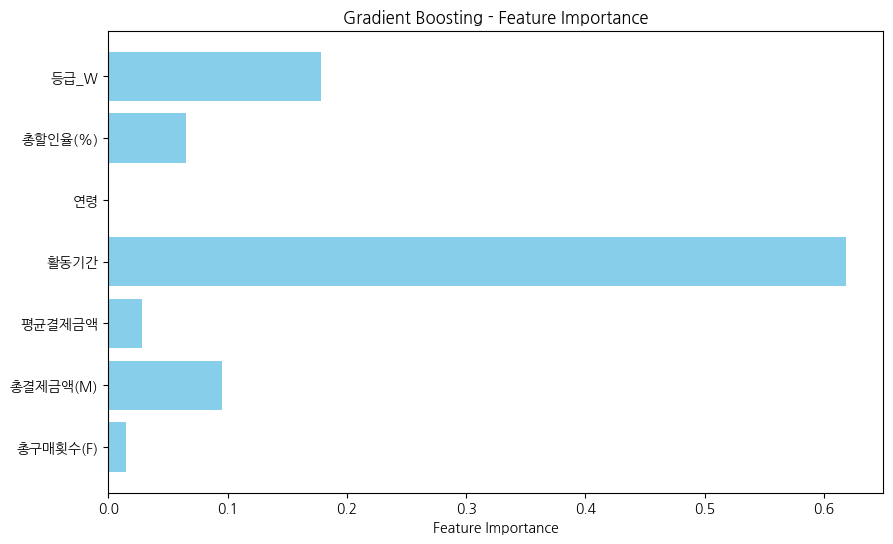

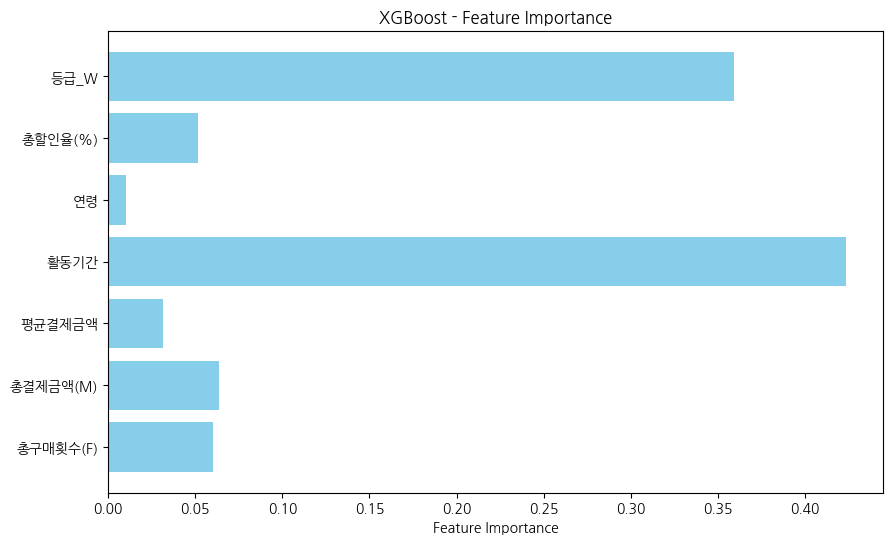

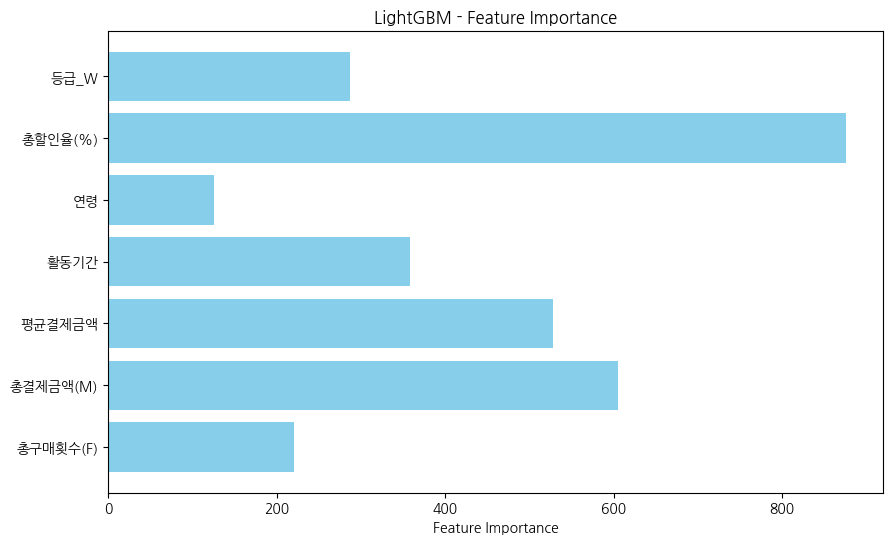

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# 모델 학습
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'LightGBM': lgb.LGBMClassifier()
}

# AUC 성능 계산 (이전 코드와 동일)
df_raw_dummy = pd.get_dummies(df_raw)
feature_cols = ['총구매횟수(F)', '총결제금액(M)', '평균결제금액', '활동기간', '연령', '총할인율(%)', '등급_W']
X = df_raw_dummy[feature_cols].dropna() 
y = df_raw_dummy.loc[X.index, '이탈여부']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 모델별 Feature Importance 시각화
for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    
    # Feature importance 추출
    if hasattr(model, 'coef_'):  # Logistic Regression
        feature_importance = np.abs(model.coef_[0])
    else:  # Decision Tree, Random Forest, Gradient Boosting, XGBoost, LightGBM
        feature_importance = model.feature_importances_

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, feature_importance, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title(f'{model_name} - Feature Importance')
    plt.show()